In [1]:
# !pip install opencv-python

In [2]:
# !pip install torchvision

In [33]:
import torch
import numpy as np
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image
import cv2
import matplotlib.pyplot as plt
from models import model

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

In [4]:
torch.cuda.get_device_name()

'NVIDIA A40'

In [5]:
m = model.STBVMM()
checkpoint = torch.load('models/ckpt_e49.pth.tar')
state_dict = checkpoint['state_dict']
m.load_state_dict(state_dict)
m.to(device)
m.eval()
pass

/home/uva_ki_rhijnwiegman/.local/lib/python3.10/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


B, H, W, C
8
torch.Size([1, 48, 48, 1])
B, H, W, C
8
torch.Size([1, 48, 48, 1])
B, H, W, C
8
torch.Size([1, 48, 48, 1])
B, H, W, C
8
torch.Size([1, 48, 48, 1])
B, H, W, C
8
torch.Size([1, 48, 48, 1])
B, H, W, C
8
torch.Size([1, 48, 48, 1])
B, H, W, C
8
torch.Size([1, 48, 48, 1])
B, H, W, C
8
torch.Size([1, 48, 48, 1])
B, H, W, C
8
torch.Size([1, 48, 48, 1])
B, H, W, C
8
torch.Size([1, 48, 48, 1])
B, H, W, C
8
torch.Size([1, 48, 48, 1])
B, H, W, C
8
torch.Size([1, 48, 48, 1])
B, H, W, C
8
torch.Size([1, 48, 48, 1])
B, H, W, C
8
torch.Size([1, 48, 48, 1])
B, H, W, C
8
torch.Size([1, 48, 48, 1])
B, H, W, C
8
torch.Size([1, 48, 48, 1])
B, H, W, C
8
torch.Size([1, 48, 48, 1])
B, H, W, C
8
torch.Size([1, 48, 48, 1])
B, H, W, C
8
torch.Size([1, 48, 48, 1])
B, H, W, C
8
torch.Size([1, 48, 48, 1])
B, H, W, C
8
torch.Size([1, 48, 48, 1])
B, H, W, C
8
torch.Size([1, 48, 48, 1])
B, H, W, C
8
torch.Size([1, 48, 48, 1])
B, H, W, C
8
torch.Size([1, 48, 48, 1])
B, H, W, C
8
torch.Size([1, 48, 48, 1])


(-0.5, 959.5, 543.5, -0.5)

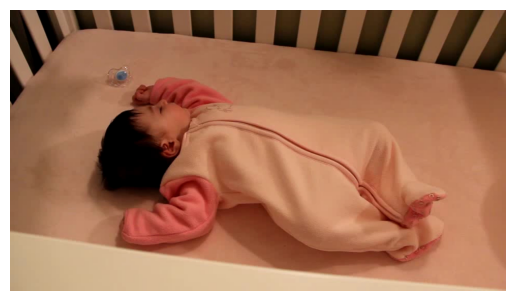

In [6]:
# vid = cv2.VideoCapture('data/examples/baby.mp4')
# vid.set(cv2.CAP_PROP_POS_FRAMES, 0)
# plt.imshow(vid.read()[1][...,::-1])

frame = cv2.imread('../motion-magnification-master/data/examples/baby_frames/baby000.jpg')[...,::-1]
plt.imshow(frame)
plt.axis('off')

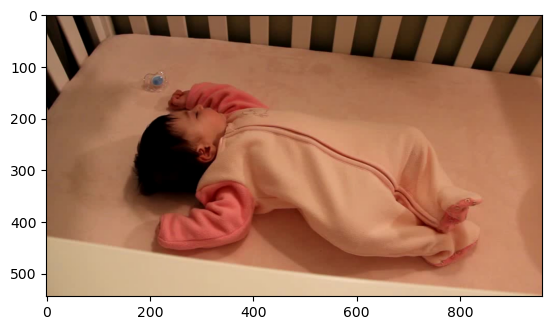

In [28]:
transform = transforms.Compose([
    transforms.ToTensor()
])

frame_a = cv2.imread('../motion-magnification-master/data/examples/baby_frames/baby000.jpg')[...,::-1]
frame_a = torch.unsqueeze(transform(to_pil_image(frame_a)).permute(1,2,0).to(device), 0)
frame_b = cv2.imread('../motion-magnification-master/data/examples/baby_frames/baby001.jpg')[...,::-1]
frame_b = torch.unsqueeze(transform(to_pil_image(frame_b)).permute(1,2,0).to(device), 0)

amplification = 100
amp_f_tensor = torch.tensor(
            [[float(amplification)]], dtype=torch.float, device=device)
plt.imshow(frame_a[0].cpu())

In [29]:
# %%timeit
pred, _, _, _ = m.forward(
    frame_a.to(device),
    frame_b.to(device),
    amp_f_tensor.reshape(1, 1).to(device))

RuntimeError: Padding size should be less than the corresponding input dimension, but got: padding (0, 5) at dimension 3 of input [1, 544, 960, 3]

In [32]:
pred, _, _ = m(
    frame_a.to(device),
    frame_b.to(device),
    amp_f_tensor.unsqueeze(1).unsqueeze(1).to(device))

RuntimeError: Padding size should be less than the corresponding input dimension, but got: padding (0, 5) at dimension 3 of input [1, 544, 960, 3]

In [ ]:
viz.show_pred(frame_a[0],
          frame_b[0],
          amp_f_tensor,
          pred[0].cpu())

In [ ]:
plt.subplot(1,3,1)
plt.imshow(frame_a[0].permute(1,2,0).cpu())
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(frame_b[0].permute(1,2,0).cpu())
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(pred[0].permute(1,2,0).cpu().detach().numpy())
plt.axis('off')

In [ ]:
# for i in range(10):
#     print('{:03d}'.format(i))

In [ ]:
# save predicted output images from the baby video from each 2-frame pair
for i in range(300):
    frame_a = cv2.imread('data/examples/baby_frames/baby' + '{:03d}'.format(i) + '.jpg')[...,::-1]
    frame_a = torch.unsqueeze(transform(to_pil_image(frame_a)).to(device), 0)
    frame_b = cv2.imread('data/examples/baby_frames/baby' + '{:03d}'.format(i+1) + '.jpg')[...,::-1]
    frame_b = torch.unsqueeze(transform(to_pil_image(frame_b)).to(device), 0)
    pred, _, _ = m.forward(
        frame_a.to(device),
        frame_b.to(device),
        amp_f_tensor.reshape(1, 1).to(device))
    pred = pred[0].permute(1,2,0).detach().cpu().numpy()[...,::-1]
    file_path = 'data/examples/baby_frames_output/baby' + '{:03d}'.format(i) + '_output.jpg'
    cv2.imwrite(file_path, 255*pred)

In [35]:
!bash magnify_video.sh -mag 20 -i ../motion-magnification-master/data/examples/baby.mp4 -m models/ckpt_e49.pth.tar -o STB-VMM_demo_x20_static -s ../ -f 30 -c

ffmpeg version 6.1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 12.3.0 (conda-forge gcc 12.3.0-5)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1710227007179/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1710227007179/_build_env/bin/x86_64-conda-linux-gnu-cc --cxx=/home/conda/feedstock_root/build_artifacts/ffmpeg_1710227007179/_build_env/bin/x86_64-conda-linux-gnu-c++ --nm=/home/conda/feedstock_root/build_artifacts/ffmpeg_1710227007179/_build_env/bin/x86_64-conda-linux-gnu-nm --ar=/home/conda/feedstock_root/build_artifacts/ffmpeg_1710227007179/_build_env/bin/x86_64-conda-linux-gnu-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-libo